# PyTorch数据处理工具箱

## utils.data  简介

In [1]:
import torch
from torch.utils import data
import numpy as np

In [2]:
# 定义简单的数据集
class TestDataset(data.Dataset):
    def __init__(self):
        self.Data = np.asarray([[1,2],[3,4],[2,1],[3,4],[4,5]])
        self.Label = np.asarray([0,1,0,1,2])
    def __getitem__(self, index):
        txt = torch.from_numpy(self.Data[index])
        label = torch.tensor(self.Label[index])
        return txt, label
    def __len__(self):
        return len(self.Data)

In [3]:
Test = TestDataset()
print(Test[2])

(tensor([2, 1]), tensor(0))


In [4]:
print(Test.__len__())

5


In [5]:
# 批量处理
test_loader = data.DataLoader(Test, batch_size=2, shuffle=False, num_workers=2)
for i, traindata in enumerate(test_loader):
    print("i:",i)
    Data, Label = traindata
    print('data:', Data)
    print('label:', Label)

i: 0
data: tensor([[1, 2],
        [3, 4]])
label: tensor([0, 1])
i: 1
data: tensor([[2, 1],
        [3, 4]])
label: tensor([0, 1])
i: 2
data: tensor([[4, 5]])
label: tensor([2])


tensor([0, 2, 0, 2, 1, 2, 1, 1])


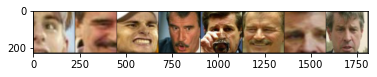

In [6]:
from torchvision import transforms, utils
from torchvision import datasets
import torch
import matplotlib.pyplot as plt 
%matplotlib inline

my_trans=transforms.Compose([
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor()
])
train_data = datasets.ImageFolder('./data/torchvision_data', transform=my_trans)
train_loader = data.DataLoader(train_data,batch_size=8,shuffle=True,)
                                            
for i_batch, img in enumerate(train_loader):
    if i_batch == 0:
        print(img[1])
        fig = plt.figure()
        grid = utils.make_grid(img[0])
        plt.imshow(grid.numpy().transpose((1, 2, 0)))
        plt.show()
        utils.save_image(grid,'test01.png')
    break

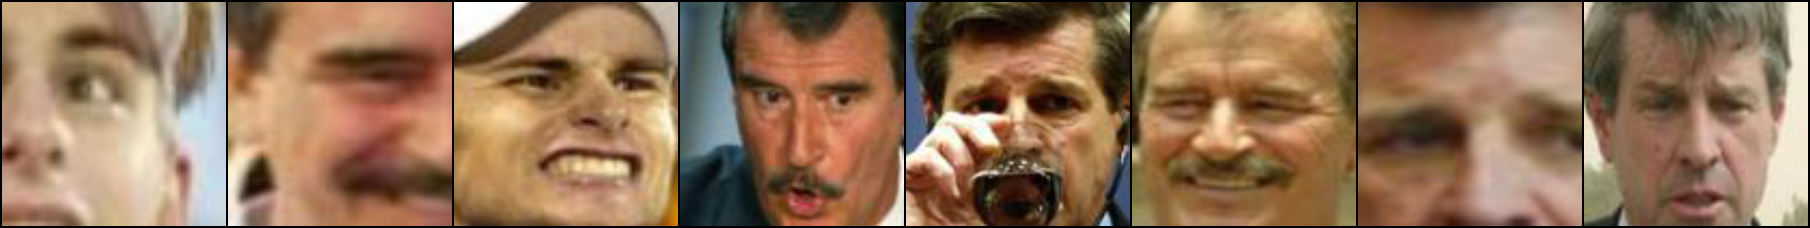

In [7]:
from PIL import Image
Image.open('test01.png')

## TensorboardX

In [8]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
from tensorboardX import SummaryWriter

In [9]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)
        self.bn = nn.BatchNorm2d(20)

    def forward(self, x):
        x = F.max_pool2d(self.conv1(x), 2)
        x = F.relu(x) + F.relu(-x)
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        x = self.bn(x)
        x = x.view(-1, 320)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)
        x = F.softmax(x, dim=1)
        return x

In [10]:
#定义输入
input = torch.rand(32, 1, 28, 28)
#实例化神经网络
model = Net()
#将model保存为graph
with SummaryWriter(log_dir='logs',comment='Net') as w:
    w.add_graph(model, (input, ))

### 自定义一个简单的网络

In [20]:
class LinearNet(torch.nn.Module):
    # 初始化
    def __init__(self):
        super(LinearNet, self).__init__()
        self.hidden = torch.nn.Linear(1, 20)
        self.predict = torch.nn.Linear(20, 1)
 
    # 前向传递
    def forward(self, x):
        x = F.relu(self.hidden(x))
        x = self.predict(x)
        return x

In [23]:
dtype = torch.FloatTensor
writer = SummaryWriter(log_dir='logs',comment='Linear')
np.random.seed(100) 
x_train = np.linspace(-1, 1, 100).reshape(100,1) 
y_train = 3*np.power(x_train, 2) +2+ 0.2*np.random.rand(x_train.size).reshape(100,1) 
learning_rate = 0.01
num_epoches = 1000

model = LinearNet()

criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

for epoch in range(num_epoches):
    inputs = torch.from_numpy(x_train).type(dtype)
    targets = torch.from_numpy(y_train).type(dtype)

    output = model(inputs)
    loss = criterion(output, targets)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    # 保存loss的数据与epoch数值
    writer.add_scalar('训练损失值-3', loss, epoch)

![2021-01-02_000.jpg](https://gitee.com/gdhu/testtingop/raw/master/2021-01-02_000.jpg)